<a href="https://colab.research.google.com/github/madhura2024/myAI_MODELS/blob/main/classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Models

fetch

In [67]:
import pandas as pd
import numpy as np
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
data = pd.read_excel(url)
# data.head(300)


clean

In [68]:
data=data.dropna(subset=["CustomerID"])
data['Description'] = data['Description'].fillna("Unknown")
data=data.dropna()

choose quantity greater than 0

In [69]:
sales=data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
sales['totalsales']=(sales['Quantity'] * sales['Quantity'])
# print("Total Sales Revenue:",totalsales)

/tmp/ipython-input-2413391551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['totalsales']=(sales['Quantity'] * sales['Quantity'])


now we are trying to find frequent customer / not  so for that we have to

*   set up threshold benchmark
*   compare and predict


In [70]:
threshold=100
sales['HighValue'] = np.where(totalsales > threshold, 1, 0)
# if > 100 return 1 else return 0

/tmp/ipython-input-216688893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['HighValue'] = np.where(totalsales > threshold, 1, 0)


choose input conditions and output to be found

In [71]:
x = sales.drop(columns=['totalsales', 'HighValue', 'Quantity', 'UnitPrice'])
x = x.select_dtypes(include='number')
y = sales['HighValue']

train-test split

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=11)

implement logistic classifier

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("📌 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

📌 Logistic Regression
Accuracy: 0.6804101687673574
              precision    recall  f1-score   support

           0       0.68      1.00      0.81     54145
           1       0.00      0.00      0.00     25432

    accuracy                           0.68     79577
   macro avg       0.34      0.50      0.40     79577
weighted avg       0.46      0.68      0.55     79577



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


confusion matrix

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[54145     0]
 [25432     0]]


0.6804101687673574

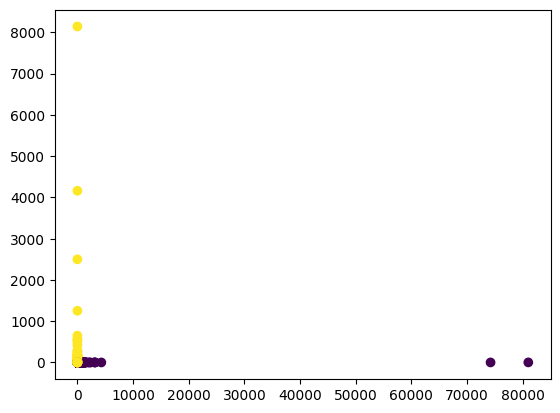

In [80]:
import matplotlib.pyplot as plt
plt.scatter(sales.loc[x_test.index, 'Quantity'], sales.loc[x_test.index, 'UnitPrice'], c=(y_test == y_pred))
plt.show()

randomforestclassifier

📌 RandomForestClassifier
Accuracy: 0.7654598690576423
              precision    recall  f1-score   support

           0       0.80      0.87      0.84     54145
           1       0.66      0.54      0.59     25432

    accuracy                           0.77     79577
   macro avg       0.73      0.70      0.71     79577
weighted avg       0.76      0.77      0.76     79577

[[47256  6889]
 [11775 13657]]


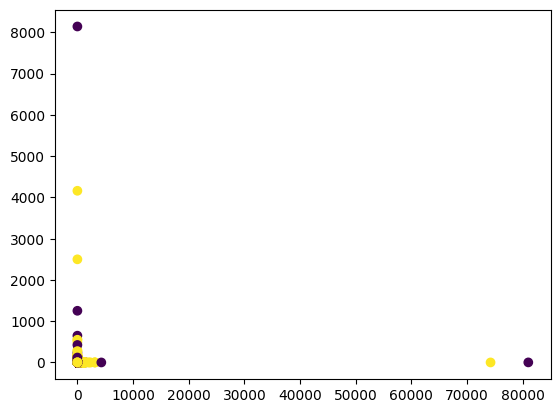

In [82]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("📌 RandomForestClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
plt.scatter(sales.loc[x_test.index, 'Quantity'], sales.loc[x_test.index, 'UnitPrice'], c=(y_test == y_pred))
plt.show()



> decisiontreeclassifier


📌 DecisionTreeClassifier
Accuracy: 0.7655478341731907
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     54145
           1       0.67      0.53      0.59     25432

    accuracy                           0.77     79577
   macro avg       0.73      0.70      0.71     79577
weighted avg       0.76      0.77      0.76     79577

[[47441  6704]
 [11953 13479]]


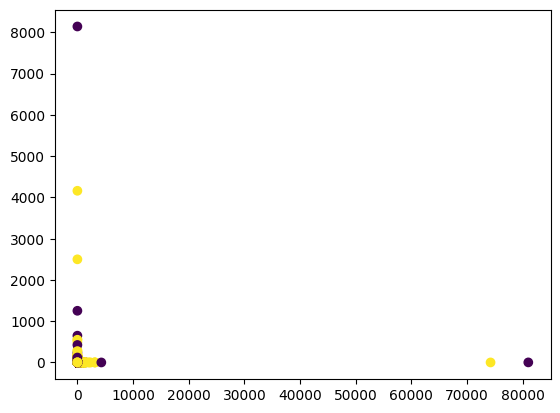

In [86]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("📌 DecisionTreeClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
plt.scatter(sales.loc[x_test.index, 'Quantity'], sales.loc[x_test.index, 'UnitPrice'], c=(y_test == y_pred))
plt.show()

knn

📌 KNeighborsClassifier
Accuracy: 0.7411312313859533
              precision    recall  f1-score   support

           0       0.80      0.83      0.81     54145
           1       0.60      0.55      0.58     25432

    accuracy                           0.74     79577
   macro avg       0.70      0.69      0.69     79577
weighted avg       0.74      0.74      0.74     79577

[[44966  9179]
 [11421 14011]]


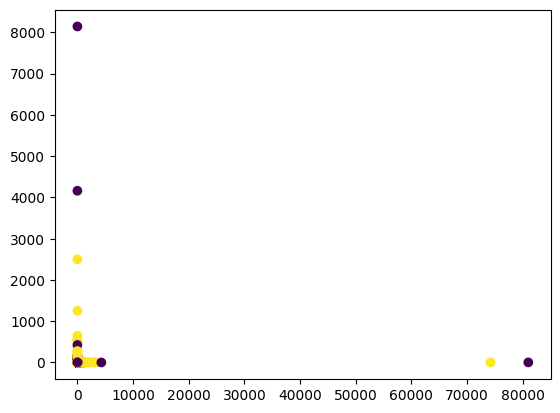

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("📌 KNeighborsClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

plt.scatter(sales.loc[x_test.index, 'Quantity'], sales.loc[x_test.index, 'UnitPrice'], c=(y_test == y_pred))
plt.show()
